In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 1000
plt.style.use('default')

### Read 2018 demographic data

In [2]:
dfc = pd.read_csv('../files/census/cc-est2018-alldata.csv', encoding='ISO-8859-1')

In [3]:
dfc.YEAR.unique()[-1]

11

In [4]:
# Get 2010 data
dfc = dfc.loc[dfc.YEAR == dfc.YEAR.unique()[-1]]

In [5]:
start_race_idx = dfc.columns.tolist().index('WA_MALE')

In [6]:
race_cols = dfc.columns[start_race_idx:]

In [7]:
# COMBINE MALE AND FEMALE RACE COLUMNS
for col in race_cols:
    if col[-6:] == 'FEMALE':
        identifier = col[:-7]
        col_male = identifier + '_MALE'
        dfc[identifier] = dfc[identifier + '_FEMALE'] + dfc[identifier + '_MALE']


In [8]:
dfc.drop(columns=race_cols, inplace=True)

In [9]:
dfc['TOT_MALE'] /= dfc['TOT_POP']

In [10]:
test = pd.DataFrame(dfc.groupby(['STATE', 'COUNTY', 'AGEGRP', 
                                 'TOT_MALE']).TOT_POP.sum()).reset_index()

In [11]:
test = pd.pivot_table(test, index=['STATE', 'COUNTY'],
               values=['TOT_POP', 'TOT_MALE'], columns='AGEGRP').reset_index(drop=True)

In [12]:
dfc = dfc.loc[dfc.AGEGRP == 0]

dfc = dfc.reset_index(drop=True)

In [13]:
test.columns = test.columns.to_flat_index()

test.columns = ['_'.join([str(value) for value in tup]) for tup in test.columns]

In [14]:
gen_rename = {1:'zero_four', 2:'five_nine', 3:'ten_fourteen', 4:'fifteen_nineteen',
                   5:'twenty_twentyfour', 6:'twentyfive_twentynine', 7:'thirty_thirtyfour',
                   8:'thirtyfive_thirtynine', 9:'forty_fortyfour', 10:'fortyfive_fortynine',
                   11:'fifty_fiftyfour', 12:'fiftyfive_fiftynine', 13:'sixty_sixtyfour',
                   14:'sixtyfive_sixtynine', 15:'seventy_seventyfour', 
                    16:'seventyfive_seventynine', 17:'eighty_eightyfour', 18:'eightyfive_older'}

In [15]:
rename_dict = dict()
for i in range(len(test.columns)):
    column = test.columns[i]
    if len(column) == 10:
#         print(column)
        if column[:-2] == 'TOT_MALE':
            column_int = int(column[-1])
            if column_int == 0:
                rename_dict[column] = column[:-2]
            else:
                rename_dict[column] = column[:-1] + gen_rename[column_int]
        else:
            rename_dict[column] = column[:-2] + gen_rename[int(column[-2:])]
    else:
        if len(column) == 11:
            rename_dict[column] = column[:-2] + gen_rename[int(column[-2:])]
#         else:
#             print(column[-1:])
        else:
            column_int = int(column[-1])
            if column_int == 0:
                rename_dict[column] = column[:-2]
            else:
                rename_dict[column] = column[:-1] + gen_rename[column_int]

In [16]:
test = test.rename(columns=rename_dict)

In [17]:
test

,TOT_MALE,TOT_MALE_zero_four,TOT_MALE_five_nine,TOT_MALE_ten_fourteen,TOT_MALE_fifteen_nineteen,TOT_MALE_twenty_twentyfour,TOT_MALE_twentyfive_twentynine,TOT_MALE_thirty_thirtyfour,TOT_MALE_thirtyfive_thirtynine,TOT_MALE_forty_fortyfour,TOT_MALE_fortyfive_fortynine,TOT_MALE_fifty_fiftyfour,TOT_MALE_fiftyfive_fiftynine,TOT_MALE_sixty_sixtyfour,TOT_MALE_sixtyfive_sixtynine,TOT_MALE_seventy_seventyfour,TOT_MALE_seventyfive_seventynine,TOT_MALE_eighty_eightyfour,TOT_MALE_eightyfive_older,TOT_POP,TOT_POP_zero_four,TOT_POP_five_nine,TOT_POP_ten_fourteen,TOT_POP_fifteen_nineteen,TOT_POP_twenty_twentyfour,TOT_POP_twentyfive_twentynine,TOT_POP_thirty_thirtyfour,TOT_POP_thirtyfive_thirtynine,TOT_POP_forty_fortyfour,TOT_POP_fortyfive_fortynine,TOT_POP_fifty_fiftyfour,TOT_POP_fiftyfive_fiftynine,TOT_POP_sixty_sixtyfour,TOT_POP_sixtyfive_sixtynine,TOT_POP_seventy_seventyfour,TOT_POP_seventyfive_seventynine,TOT_POP_eighty_eightyfour,TOT_POP_eightyfive_older
0,0.485513,0.513674,0.519720,0.509274,0.509454,0.513394,0.493927,0.479341,0.487045,0.474834,0.482098,0.484125,0.498090,0.462156,0.474314,0.440935,0.416331,0.426072,0.377727,55601.0,3364.0,3423.0,3882.0,3755.0,3173.0,3705.0,3461.0,3628.0,3616.0,3966.0,3811.0,3927.0,3237.0,2589.0,2311.0,1739.0,1143.0,871.0
1,0.484616,0.513174,0.509217,0.504184,0.494742,0.507022,0.492743,0.492743,0.480237,0.486216,0.486688,0.478655,0.471037,0.466454,0.464148,0.479031,0.466155,0.470774,0.407760,218022.0,11955.0,12802.0,13981.0,12932.0,11108.0,12471.0,12057.0,13156.0,12877.0,14461.0,14242.0,15744.0,15665.0,14267.0,12471.0,8465.0,5064.0,4304.0
2,0.527832,0.510903,0.495166,0.513585,0.523088,0.591712,0.630846,0.594012,0.602874,0.597931,0.572044,0.528384,0.493134,0.487630,0.455195,0.454749,0.442117,0.401042,0.313559,24881.0,1284.0,1448.0,1509.0,1451.0,1472.0,1796.0,1670.0,1531.0,1450.0,1624.0,1603.0,1675.0,1536.0,1540.0,1337.0,907.0,576.0,472.0
3,0.532188,0.510506,0.520922,0.536199,0.537795,0.588642,0.575898,0.599625,0.603175,0.552778,0.554443,0.535737,0.522164,0.492296,0.487310,0.458669,0.441860,0.390995,0.297521,22400.0,1285.0,1171.0,1326.0,1270.0,1303.0,1726.0,1601.0,1512.0,1440.0,1598.0,1581.0,1534.0,1363.0,1182.0,992.0,731.0,422.0,363.0
4,0.492739,0.497977,0.505640,0.492824,0.513086,0.528634,0.502525,0.500593,0.505122,0.489446,0.502168,0.493457,0.515328,0.484659,0.476539,0.448835,0.456345,0.451266,0.359496,57840.0,3460.0,3635.0,3902.0,3668.0,3178.0,3564.0,3370.0,3514.0,3553.0,3921.0,3897.0,3947.0,3683.0,3282.0,2961.0,1970.0,1303.0,1032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.514553,0.522550,0.513154,0.502567,0.513433,0.522359,0.515537,0.508618,0.516243,0.524665,0.520833,0.521411,0.523098,0.537552,0.513304,0.504029,0.507803,0.447699,0.339703,43051.0,2949.0,3155.0,3311.0,3015.0,2527.0,2832.0,3191.0,3386.0,2838.0,2496.0,2382.0,2879.0,2876.0,2067.0,1365.0,833.0,478.0,471.0
3138,0.515966,0.522085,0.480032,0.533278,0.509664,0.431354,0.535204,0.523176,0.544794,0.552995,0.547125,0.491216,0.494352,0.512638,0.537538,0.508647,0.501706,0.463855,0.406154,23081.0,1132.0,1252.0,1202.0,983.0,1078.0,1889.0,2028.0,2065.0,1736.0,1687.0,1423.0,1505.0,1543.0,1332.0,983.0,586.0,332.0,325.0
3139,0.506675,0.511440,0.517431,0.502576,0.548011,0.501502,0.485269,0.496779,0.506164,0.500795,0.509717,0.511236,0.505857,0.504178,0.519678,0.519582,0.503212,0.452381,0.349020,20299.0,1486.0,1635.0,1747.0,1458.0,999.0,1154.0,1242.0,1460.0,1258.0,1132.0,1068.0,1366.0,1436.0,1118.0,766.0,467.0,252.0,255.0
3140,0.505770,0.539409,0.486726,0.500000,0.538879,0.502841,0.504132,0.552885,0.476386,0.500000,0.528261,0.523166,0.490300,0.514143,0.518375,0.485714,0.545171,0.400000,0.400826,7885.0,406.0,452.0,560.0,553.0,352.0,363.0,416.0,487.0,440.0,460.0,518.0,567.0,601.0,517.0,420.0,321.0,210.0,242.0


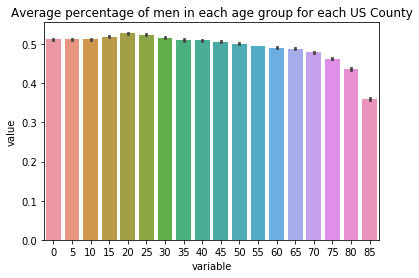

In [18]:
test2 = test[test.columns[1:19:1]].melt()
plt.title('Average percentage of men in each age group for each US County')
sns.barplot(x='variable', y='value', data=test2)
plt.xticks(np.arange(0, 18), [str(num) for num in np.arange(0, 90, 5)])
plt.show()

In [19]:
test

,TOT_MALE,TOT_MALE_zero_four,TOT_MALE_five_nine,TOT_MALE_ten_fourteen,TOT_MALE_fifteen_nineteen,TOT_MALE_twenty_twentyfour,TOT_MALE_twentyfive_twentynine,TOT_MALE_thirty_thirtyfour,TOT_MALE_thirtyfive_thirtynine,TOT_MALE_forty_fortyfour,TOT_MALE_fortyfive_fortynine,TOT_MALE_fifty_fiftyfour,TOT_MALE_fiftyfive_fiftynine,TOT_MALE_sixty_sixtyfour,TOT_MALE_sixtyfive_sixtynine,TOT_MALE_seventy_seventyfour,TOT_MALE_seventyfive_seventynine,TOT_MALE_eighty_eightyfour,TOT_MALE_eightyfive_older,TOT_POP,TOT_POP_zero_four,TOT_POP_five_nine,TOT_POP_ten_fourteen,TOT_POP_fifteen_nineteen,TOT_POP_twenty_twentyfour,TOT_POP_twentyfive_twentynine,TOT_POP_thirty_thirtyfour,TOT_POP_thirtyfive_thirtynine,TOT_POP_forty_fortyfour,TOT_POP_fortyfive_fortynine,TOT_POP_fifty_fiftyfour,TOT_POP_fiftyfive_fiftynine,TOT_POP_sixty_sixtyfour,TOT_POP_sixtyfive_sixtynine,TOT_POP_seventy_seventyfour,TOT_POP_seventyfive_seventynine,TOT_POP_eighty_eightyfour,TOT_POP_eightyfive_older
0,0.485513,0.513674,0.519720,0.509274,0.509454,0.513394,0.493927,0.479341,0.487045,0.474834,0.482098,0.484125,0.498090,0.462156,0.474314,0.440935,0.416331,0.426072,0.377727,55601.0,3364.0,3423.0,3882.0,3755.0,3173.0,3705.0,3461.0,3628.0,3616.0,3966.0,3811.0,3927.0,3237.0,2589.0,2311.0,1739.0,1143.0,871.0
1,0.484616,0.513174,0.509217,0.504184,0.494742,0.507022,0.492743,0.492743,0.480237,0.486216,0.486688,0.478655,0.471037,0.466454,0.464148,0.479031,0.466155,0.470774,0.407760,218022.0,11955.0,12802.0,13981.0,12932.0,11108.0,12471.0,12057.0,13156.0,12877.0,14461.0,14242.0,15744.0,15665.0,14267.0,12471.0,8465.0,5064.0,4304.0
2,0.527832,0.510903,0.495166,0.513585,0.523088,0.591712,0.630846,0.594012,0.602874,0.597931,0.572044,0.528384,0.493134,0.487630,0.455195,0.454749,0.442117,0.401042,0.313559,24881.0,1284.0,1448.0,1509.0,1451.0,1472.0,1796.0,1670.0,1531.0,1450.0,1624.0,1603.0,1675.0,1536.0,1540.0,1337.0,907.0,576.0,472.0
3,0.532188,0.510506,0.520922,0.536199,0.537795,0.588642,0.575898,0.599625,0.603175,0.552778,0.554443,0.535737,0.522164,0.492296,0.487310,0.458669,0.441860,0.390995,0.297521,22400.0,1285.0,1171.0,1326.0,1270.0,1303.0,1726.0,1601.0,1512.0,1440.0,1598.0,1581.0,1534.0,1363.0,1182.0,992.0,731.0,422.0,363.0
4,0.492739,0.497977,0.505640,0.492824,0.513086,0.528634,0.502525,0.500593,0.505122,0.489446,0.502168,0.493457,0.515328,0.484659,0.476539,0.448835,0.456345,0.451266,0.359496,57840.0,3460.0,3635.0,3902.0,3668.0,3178.0,3564.0,3370.0,3514.0,3553.0,3921.0,3897.0,3947.0,3683.0,3282.0,2961.0,1970.0,1303.0,1032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.514553,0.522550,0.513154,0.502567,0.513433,0.522359,0.515537,0.508618,0.516243,0.524665,0.520833,0.521411,0.523098,0.537552,0.513304,0.504029,0.507803,0.447699,0.339703,43051.0,2949.0,3155.0,3311.0,3015.0,2527.0,2832.0,3191.0,3386.0,2838.0,2496.0,2382.0,2879.0,2876.0,2067.0,1365.0,833.0,478.0,471.0
3138,0.515966,0.522085,0.480032,0.533278,0.509664,0.431354,0.535204,0.523176,0.544794,0.552995,0.547125,0.491216,0.494352,0.512638,0.537538,0.508647,0.501706,0.463855,0.406154,23081.0,1132.0,1252.0,1202.0,983.0,1078.0,1889.0,2028.0,2065.0,1736.0,1687.0,1423.0,1505.0,1543.0,1332.0,983.0,586.0,332.0,325.0
3139,0.506675,0.511440,0.517431,0.502576,0.548011,0.501502,0.485269,0.496779,0.506164,0.500795,0.509717,0.511236,0.505857,0.504178,0.519678,0.519582,0.503212,0.452381,0.349020,20299.0,1486.0,1635.0,1747.0,1458.0,999.0,1154.0,1242.0,1460.0,1258.0,1132.0,1068.0,1366.0,1436.0,1118.0,766.0,467.0,252.0,255.0
3140,0.505770,0.539409,0.486726,0.500000,0.538879,0.502841,0.504132,0.552885,0.476386,0.500000,0.528261,0.523166,0.490300,0.514143,0.518375,0.485714,0.545171,0.400000,0.400826,7885.0,406.0,452.0,560.0,553.0,352.0,363.0,416.0,487.0,440.0,460.0,518.0,567.0,601.0,517.0,420.0,321.0,210.0,242.0


In [20]:
(test.TOT_POP == dfc.TOT_POP).unique()

array([ True])

In [21]:
test.drop(columns=['TOT_POP', 'TOT_MALE'], inplace=True)

In [22]:
test

,TOT_MALE_zero_four,TOT_MALE_five_nine,TOT_MALE_ten_fourteen,TOT_MALE_fifteen_nineteen,TOT_MALE_twenty_twentyfour,TOT_MALE_twentyfive_twentynine,TOT_MALE_thirty_thirtyfour,TOT_MALE_thirtyfive_thirtynine,TOT_MALE_forty_fortyfour,TOT_MALE_fortyfive_fortynine,TOT_MALE_fifty_fiftyfour,TOT_MALE_fiftyfive_fiftynine,TOT_MALE_sixty_sixtyfour,TOT_MALE_sixtyfive_sixtynine,TOT_MALE_seventy_seventyfour,TOT_MALE_seventyfive_seventynine,TOT_MALE_eighty_eightyfour,TOT_MALE_eightyfive_older,TOT_POP_zero_four,TOT_POP_five_nine,TOT_POP_ten_fourteen,TOT_POP_fifteen_nineteen,TOT_POP_twenty_twentyfour,TOT_POP_twentyfive_twentynine,TOT_POP_thirty_thirtyfour,TOT_POP_thirtyfive_thirtynine,TOT_POP_forty_fortyfour,TOT_POP_fortyfive_fortynine,TOT_POP_fifty_fiftyfour,TOT_POP_fiftyfive_fiftynine,TOT_POP_sixty_sixtyfour,TOT_POP_sixtyfive_sixtynine,TOT_POP_seventy_seventyfour,TOT_POP_seventyfive_seventynine,TOT_POP_eighty_eightyfour,TOT_POP_eightyfive_older
0,0.513674,0.519720,0.509274,0.509454,0.513394,0.493927,0.479341,0.487045,0.474834,0.482098,0.484125,0.498090,0.462156,0.474314,0.440935,0.416331,0.426072,0.377727,3364.0,3423.0,3882.0,3755.0,3173.0,3705.0,3461.0,3628.0,3616.0,3966.0,3811.0,3927.0,3237.0,2589.0,2311.0,1739.0,1143.0,871.0
1,0.513174,0.509217,0.504184,0.494742,0.507022,0.492743,0.492743,0.480237,0.486216,0.486688,0.478655,0.471037,0.466454,0.464148,0.479031,0.466155,0.470774,0.407760,11955.0,12802.0,13981.0,12932.0,11108.0,12471.0,12057.0,13156.0,12877.0,14461.0,14242.0,15744.0,15665.0,14267.0,12471.0,8465.0,5064.0,4304.0
2,0.510903,0.495166,0.513585,0.523088,0.591712,0.630846,0.594012,0.602874,0.597931,0.572044,0.528384,0.493134,0.487630,0.455195,0.454749,0.442117,0.401042,0.313559,1284.0,1448.0,1509.0,1451.0,1472.0,1796.0,1670.0,1531.0,1450.0,1624.0,1603.0,1675.0,1536.0,1540.0,1337.0,907.0,576.0,472.0
3,0.510506,0.520922,0.536199,0.537795,0.588642,0.575898,0.599625,0.603175,0.552778,0.554443,0.535737,0.522164,0.492296,0.487310,0.458669,0.441860,0.390995,0.297521,1285.0,1171.0,1326.0,1270.0,1303.0,1726.0,1601.0,1512.0,1440.0,1598.0,1581.0,1534.0,1363.0,1182.0,992.0,731.0,422.0,363.0
4,0.497977,0.505640,0.492824,0.513086,0.528634,0.502525,0.500593,0.505122,0.489446,0.502168,0.493457,0.515328,0.484659,0.476539,0.448835,0.456345,0.451266,0.359496,3460.0,3635.0,3902.0,3668.0,3178.0,3564.0,3370.0,3514.0,3553.0,3921.0,3897.0,3947.0,3683.0,3282.0,2961.0,1970.0,1303.0,1032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.522550,0.513154,0.502567,0.513433,0.522359,0.515537,0.508618,0.516243,0.524665,0.520833,0.521411,0.523098,0.537552,0.513304,0.504029,0.507803,0.447699,0.339703,2949.0,3155.0,3311.0,3015.0,2527.0,2832.0,3191.0,3386.0,2838.0,2496.0,2382.0,2879.0,2876.0,2067.0,1365.0,833.0,478.0,471.0
3138,0.522085,0.480032,0.533278,0.509664,0.431354,0.535204,0.523176,0.544794,0.552995,0.547125,0.491216,0.494352,0.512638,0.537538,0.508647,0.501706,0.463855,0.406154,1132.0,1252.0,1202.0,983.0,1078.0,1889.0,2028.0,2065.0,1736.0,1687.0,1423.0,1505.0,1543.0,1332.0,983.0,586.0,332.0,325.0
3139,0.511440,0.517431,0.502576,0.548011,0.501502,0.485269,0.496779,0.506164,0.500795,0.509717,0.511236,0.505857,0.504178,0.519678,0.519582,0.503212,0.452381,0.349020,1486.0,1635.0,1747.0,1458.0,999.0,1154.0,1242.0,1460.0,1258.0,1132.0,1068.0,1366.0,1436.0,1118.0,766.0,467.0,252.0,255.0
3140,0.539409,0.486726,0.500000,0.538879,0.502841,0.504132,0.552885,0.476386,0.500000,0.528261,0.523166,0.490300,0.514143,0.518375,0.485714,0.545171,0.400000,0.400826,406.0,452.0,560.0,553.0,352.0,363.0,416.0,487.0,440.0,460.0,518.0,567.0,601.0,517.0,420.0,321.0,210.0,242.0


In [23]:
dfc = pd.concat([dfc, test], axis=1)

In [24]:
# # GET AGE BRACKETS FOR TOTAL POPULATION, USE TOTAL FOR ALL OTHER DEMOGRAPHICS
# dfage = pd.DataFrame(dfc.groupby(['STATE', 'COUNTY', 'AGEGRP']).TOT_POP.sum()).reset_index()

# dfage = pd.pivot_table(dfage, index=['STATE', 'COUNTY'],
#                values='TOT_POP', columns='AGEGRP').reset_index(drop=True)

# dfc = dfc.loc[dfc.AGEGRP == 0]

# dfc = dfc.reset_index(drop=True)

# dfage.rename(columns={0:'total'}, inplace=True)

# (dfage.total == dfc.TOT_POP).unique()

In [25]:
# dfc = pd.concat([dfc, dfage], axis=1)

In [26]:
dfc.TOT_MALE = dfc.TOT_POP - dfc.TOT_FEMALE

In [27]:
dfc = dfc.drop(columns=['AGEGRP', 'YEAR', 'SUMLEV', 'TOT_FEMALE'])

In [28]:
dfc.columns[5:]

Index(['TOT_MALE', 'WA', 'BA', 'IA', 'AA', 'NA', 'TOM', 'WAC', 'BAC', 'IAC',
       'AAC', 'NAC', 'NH', 'NHWA', 'NHBA', 'NHIA', 'NHAA', 'NHNA', 'NHTOM',
       'NHWAC', 'NHBAC', 'NHIAC', 'NHAAC', 'NHNAC', 'H', 'HWA', 'HBA', 'HIA',
       'HAA', 'HNA', 'HTOM', 'HWAC', 'HBAC', 'HIAC', 'HAAC', 'HNAC',
       'TOT_MALE_zero_four', 'TOT_MALE_five_nine', 'TOT_MALE_ten_fourteen',
       'TOT_MALE_fifteen_nineteen', 'TOT_MALE_twenty_twentyfour',
       'TOT_MALE_twentyfive_twentynine', 'TOT_MALE_thirty_thirtyfour',
       'TOT_MALE_thirtyfive_thirtynine', 'TOT_MALE_forty_fortyfour',
       'TOT_MALE_fortyfive_fortynine', 'TOT_MALE_fifty_fiftyfour',
       'TOT_MALE_fiftyfive_fiftynine', 'TOT_MALE_sixty_sixtyfour',
       'TOT_MALE_sixtyfive_sixtynine', 'TOT_MALE_seventy_seventyfour',
       'TOT_MALE_seventyfive_seventynine', 'TOT_MALE_eighty_eightyfour',
       'TOT_MALE_eightyfive_older', 'TOT_POP_zero_four', 'TOT_POP_five_nine',
       'TOT_POP_ten_fourteen', 'TOT_POP_fifteen_nineteen',
   

In [29]:
low_idx = dfc.columns.tolist().index('TOT_MALE_zero_four')
high_idx = dfc.columns.tolist().index('TOT_MALE_eightyfive_older')

In [30]:
# NORMALIZE FEATURES TO POPULATION SIZE
dont_norm = dfc.columns[low_idx:high_idx + 1].tolist()

for column in dfc.columns[5:]:
    if column not in dont_norm:
        dfc[column] /= dfc.TOT_POP

In [31]:
dfc['FIPS'] = dfc.STATE.map(lambda x: '{:02d}'.format(x)) + dfc.COUNTY.map(lambda x: 
                                                                        '{:03d}'.format(x))

### Read 2018 population data

In [32]:
dfp = pd.read_csv('../files/census/co-est2018-alldata.csv', encoding='ISO-8859-1')

In [33]:
dfp['FIPS'] = dfp.STATE.map(lambda x: '{:02d}'.format(x)) + dfp.COUNTY.map(lambda x: 
                                                                        '{:03d}'.format(x))

In [34]:
keep_columns = ['RNETMIG2018', 'RDOMESTICMIG2018', 'RINTERNATIONALMIG2018',
               'RNATURALINC2018', 'RDEATH2018', 'RBIRTH2018',
               'REGION', 'DIVISION', 'FIPS']

In [35]:
divide_columns = ['GQESTIMATES2018', 'NPOPCHG_2018']

In [36]:
for col in divide_columns:
    dfp[col] = dfp[col] / dfp.POPESTIMATE2018

In [37]:
dfp = dfp[keep_columns + divide_columns]

In [38]:
df = dfc.set_index('FIPS').join(dfp.set_index('FIPS'))

### Read 2018 employment and income data

In [39]:
dfe = pd.read_csv('../files/census/unemployment.csv', encoding='ISO-8859-1', header=7)

In [40]:
dfe_keep = ['FIPStxt', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 
            'Median_Household_Income_2018', 'Rural_urban_continuum_code_2013',
           'Urban_influence_code_2013', 'Metro_2013']

In [41]:
dfe = dfe[dfe_keep]

In [42]:
with_commas = ['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 
            'Median_Household_Income_2018']

In [43]:
for col in with_commas:
    dfe[col] = dfe[col].str.replace(',', '').fillna(0).astype(int).replace(0, np.nan)

#### Some counties in Alaska have missing values

In [44]:
dfe['Employed_2018'].sort_values()[-5:]

194     18460725.0
0      155102319.0
92             NaN
95             NaN
99             NaN
Name: Employed_2018, dtype: float64

In [45]:
dfe.loc[dfe['Employed_2018'].isnull()]

,FIPStxt,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013
92,2201,NaN,NaN,NaN,NaN,NaN,NaN,0.0
95,2232,NaN,NaN,NaN,NaN,NaN,NaN,0.0
99,2280,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [46]:
dfe['FIPStxt'] = dfe.FIPStxt.map(lambda x: '{:05d}'.format(x))

In [47]:
df_temp = df.join(dfe.set_index('FIPStxt'))

In [48]:
new_divide = ['Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018']

In [49]:
for col in new_divide:
    df_temp[col] = df_temp[col] / df_temp.TOT_POP

In [50]:
df = df_temp

In [51]:
# SET EMPLOYMENT AND UNEMPLOYMENT RATES TO BE PERCENT OF LABOR FORCE
df['Employed_2018'] = df['Employed_2018'] / df['Civilian_labor_force_2018']
df['Unemployed_2018'] = df['Unemployed_2018'] / df['Civilian_labor_force_2018']

### Read 2018 education data

In [52]:
dfd = pd.read_csv('../files/census/education.csv', encoding='ISO-8859-1', header=4)

In [53]:
dfd_keep = ['FIPS Code', 'Percent of adults with less than a high school diploma, 2014-18',
           'Percent of adults with a high school diploma only, 2014-18',
           'Percent of adults completing some college or associate\'s degree, 2014-18',
           'Percent of adults with a bachelor\'s degree or higher, 2014-18']

In [54]:
dfd = dfd[dfd_keep]

In [55]:
dfd['FIPS Code'] = dfd['FIPS Code'].map(lambda x: '{:05d}'.format(x))

In [56]:
df = df.join(dfd.set_index('FIPS Code'))

### Read land area data

In [57]:
dfl = pd.read_csv('../files/land.csv')

In [58]:
dfl.fips = dfl.fips.map(lambda x: '{:05d}'.format(x))

In [59]:
dfl = dfl.drop('POP060210', axis=1)

In [60]:
dfl.rename(columns={'LND110210':'LAND_AREA'}, inplace=True)

In [61]:
df = df.join(dfl.set_index('fips'))

In [62]:
df['DENSITY'] = df.TOT_POP / df.LAND_AREA

In [63]:
df

,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,TOT_MALE,WA,BA,IA,AA,NA,TOM,WAC,BAC,IAC,AAC,NAC,NH,NHWA,NHBA,NHIA,NHAA,NHNA,NHTOM,NHWAC,NHBAC,NHIAC,NHAAC,NHNAC,H,HWA,HBA,HIA,HAA,HNA,HTOM,HWAC,HBAC,HIAC,HAAC,HNAC,TOT_MALE_zero_four,TOT_MALE_five_nine,TOT_MALE_ten_fourteen,TOT_MALE_fifteen_nineteen,TOT_MALE_twenty_twentyfour,TOT_MALE_twentyfive_twentynine,TOT_MALE_thirty_thirtyfour,TOT_MALE_thirtyfive_thirtynine,TOT_MALE_forty_fortyfour,TOT_MALE_fortyfive_fortynine,TOT_MALE_fifty_fiftyfour,TOT_MALE_fiftyfive_fiftynine,TOT_MALE_sixty_sixtyfour,TOT_MALE_sixtyfive_sixtynine,TOT_MALE_seventy_seventyfour,TOT_MALE_seventyfive_seventynine,TOT_MALE_eighty_eightyfour,TOT_MALE_eightyfive_older,TOT_POP_zero_four,TOT_POP_five_nine,TOT_POP_ten_fourteen,TOT_POP_fifteen_nineteen,TOT_POP_twenty_twentyfour,TOT_POP_twentyfive_twentynine,TOT_POP_thirty_thirtyfour,TOT_POP_thirtyfive_thirtynine,TOT_POP_forty_fortyfour,TOT_POP_fortyfive_fortynine,TOT_POP_fifty_fiftyfour,TOT_POP_fiftyfive_fiftynine,TOT_POP_sixty_sixtyfour,TOT_POP_sixtyfive_sixtynine,TOT_POP_seventy_seventyfour,TOT_POP_seventyfive_seventynine,TOT_POP_eighty_eightyfour,TOT_POP_eightyfive_older,RNETMIG2018,RDOMESTICMIG2018,RINTERNATIONALMIG2018,RNATURALINC2018,RDEATH2018,RBIRTH2018,REGION,DIVISION,GQESTIMATES2018,NPOPCHG_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",LAND_AREA,DENSITY
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,1,1,Alabama,Autauga County,55601,0.485513,0.767252,0.196309,0.004802,0.012248,0.001115,0.018273,0.783799,0.206165,0.010270,0.017302,0.002104,0.970342,0.743080,0.193432,0.004370,0.012050,0.000773,0.016636,0.758296,0.202388,0.009029,0.016654,0.001493,0.029658,0.024172,0.002878,0.000432,0.000198,0.000342,0.001637,0.025503,0.003777,0.001241,0.000647,0.000611,0.513674,0.519720,0.509274,0.509454,0.513394,0.493927,0.479341,0.487045,0.474834,0.482098,0.484125,0.498090,0.462156,0.474314,0.440935,0.416331,0.426072,0.377727,0.060503,0.061564,0.069819,0.067535,0.057067,0.066635,0.062247,0.065251,0.065035,0.071330,0.068542,0.070628,0.058218,0.046564,0.041564,0.031276,0.020557,0.015665,0.630381,0.666403,-0.036022,2.215338,9.581787,11.797125,3,6,0.008183,0.002842,0.471143,0.964308,0.035692,59338.0,2.0,2.0,1.0,11.3,32.6,28.4,27.7,594.44,93.535092
01003,1,3,Alabama,Baldwin County,218022,0.484616,0.872852,0.089404,0.007724,0.011503,0.000670,0.017847,0.889598,0.096885,0.015939,0.015613,0.001624,0.953532,0.831113,0.087840,0.006701,0.011343,0.000509,0.016026,0.846300,0.094536,0.013870,0.015035,0.001211,0.046468,0.041739,0.001564,0.001023,0.000161,0.000161,0.001821,0.043298,0.002348,0.002069,0.000578,0.000413,0.513174,0.509217,0.504184,0.494742,0.507022,0.492743,0.492743,0.480237,0.486216,0.486688,0.478655,0.471037,0.466454,0.464148,0.479031,0.466155,0.470774,0.407760,0.054834,0.058719,0.064127,0.059315,0.050949,0.057201,0.055302,0.060343,0.059063,0.066328,0.065324,0.072213,0.071851,0.065438,0.057201,0.038826,0.023227,0.019741,24.846682,24.298662,0.548020,0.120750,10.347366,10.468116,3,6,0.010045,0.024782,0.436805,0.964046,0.035954,57588.0,3.0,2.0,1.0,9.7,27.6,31.3,31.3,1589.78,137.139730
01005,1,5,Alabama,Barbour County,24881,0.527832,0.490696,0.483984,0.006591,0.004542,0.001849,0.012339,0.500342,0.492906,0.011575,0.006069,0.002130,0.957236,0.456413,0.480326,0.003416,0.004542,0.001085,0.011455,0.465456,0.488606,0.007837,0.006029,0.001367,0.042764,0.034283,0.003657,0.003175,0.000000,0.000764,0.000884,0.034886,0.004300,0.003738,0.000040,0.000764,0.510903,0.495166,0.513585,0.523088,0.591712,0.630846,0.594012,0.602874,0.597931,0.572044,0.528384,0.493134,0.487630,

In [64]:
dfdc = pd.read_csv('../files/census/dc.csv')

In [65]:
dfdc.county = dfdc.county.map(lambda x: x[6:])

In [66]:
df = df.join(dfdc[['county', 'med_age']].set_index('county'))

In [67]:
df = df.loc[~(df.CTYNAME == 'Kalawao County')]

In [68]:
df = df.fillna(value=0)

### Get 2016 election results

In [69]:
dfel = pd.read_csv('../files/election/2016_US_County_Level_Presidential_Results.csv', index_col=0)

dfel.combined_fips = dfel.combined_fips.map(lambda x: '{:05d}'.format(x))

dfel = dfel[['combined_fips', 'per_dem', 'per_gop']]

df = df.join(dfel.set_index('combined_fips'))

### Save census data to disk

In [70]:
df.to_csv('../files/modeling_data/census_data_age_gend.csv')

### Look at hypothesis from *Logic of Life*

In [89]:
import scipy.stats as st

In [90]:
dh = df.copy()

In [91]:
dh['young_wr'] = ((1 - dh.TOT_MALE_twenty_twentyfour) + \
                 (1 - dh.TOT_MALE_twentyfive_twentynine)) / 2

In [92]:
low_pop = dh.DENSITY.quantile(0.2)

In [93]:
dh['young_wa'] = (((1 - dh.TOT_MALE_twenty_twentyfour) * dh.TOT_POP_twenty_twentyfour) + \
    (((1 - dh.TOT_MALE_twentyfive_twentynine) * dh.TOT_POP_twentyfive_twentynine))) # * dh.TOT_POP 

In [94]:
dh['young_w'] = (dh.young_wa.rank() + dh.young_wr.rank()) / 2

In [95]:
dh = dh.loc[dh.DENSITY > low_pop]

In [96]:
x = dh['Median_Household_Income_2018']
y = dh.young_w

In [97]:
st.pearsonr(x, y)

(0.06342676600199874, 0.0014699026972203582)

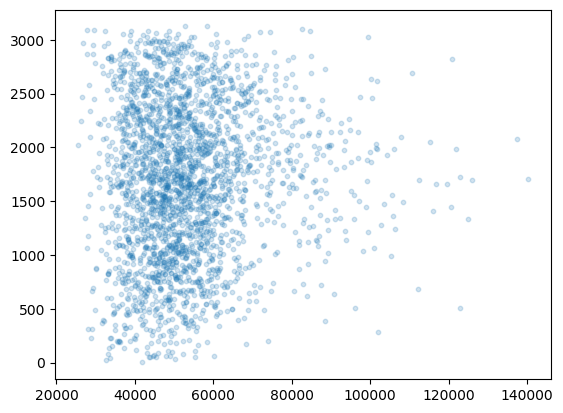

In [99]:
plt.style.use('default')
plt.scatter(x, y, alpha=0.2, s=10)

In [100]:
dh.sort_values(by='young_w', ascending=False)[['STNAME', 'CTYNAME', 'young_wa', 'young_wr',
                                              'Median_Household_Income_2018']][:50]

,STNAME,CTYNAME,young_wa,young_wr,Median_Household_Income_2018
FIPS,,,,,
51830,Virginia,Williamsburg city,0.153330,0.539551,52845.0
51630,Virginia,Fredericksburg city,0.128980,0.559500,58448.0
11001,District of Columbia,District of Columbia,0.104741,0.542647,82533.0
01119,Alabama,Sumter County,0.113072,0.530015,27859.0
28021,Mississippi,Claiborne County,0.103310,0.534901,29631.0
01087,Alabama,Macon County,0.101361,0.537953,32495.0
37147,North Carolina,Pitt County,0.109180,0.528665,43303.0
51760,Virginia,Richmond city,0.108780,0.528350,48747.0
28035,Mississippi,Forrest County,0.103071,0.532047,39061.0


In [82]:
dh.sort_values(by='young_wr', ascending=False)[['STNAME', 'CTYNAME', 'young_wa', 'young_wr']][:50]

,STNAME,CTYNAME,young_wa,young_wr
FIPS,,,,
13235,Georgia,Pulaski County,793.0,0.603757
29117,Missouri,Livingston County,1159.0,0.594765
51790,Virginia,Staunton city,1840.0,0.583430
29007,Missouri,Audrain County,1878.0,0.582678
51065,Virginia,Fluvanna County,1700.0,0.581046
18121,Indiana,Parke County,1207.0,0.572165
54089,West Virginia,Summers County,754.0,0.567318
51630,Virginia,Fredericksburg city,3759.0,0.559500
05041,Arkansas,Desha County,692.0,0.550241


In [83]:
dh.loc[dh.CTYNAME == 'Los Angeles County']

,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,TOT_MALE,WA,BA,IA,AA,NA,TOM,WAC,BAC,IAC,AAC,NAC,NH,NHWA,NHBA,NHIA,NHAA,NHNA,NHTOM,NHWAC,NHBAC,NHIAC,NHAAC,NHNAC,H,HWA,HBA,HIA,HAA,HNA,HTOM,HWAC,HBAC,HIAC,HAAC,HNAC,TOT_MALE_zero_four,TOT_MALE_five_nine,TOT_MALE_ten_fourteen,TOT_MALE_fifteen_nineteen,TOT_MALE_twenty_twentyfour,TOT_MALE_twentyfive_twentynine,TOT_MALE_thirty_thirtyfour,TOT_MALE_thirtyfive_thirtynine,TOT_MALE_forty_fortyfour,TOT_MALE_fortyfive_fortynine,TOT_MALE_fifty_fiftyfour,TOT_MALE_fiftyfive_fiftynine,TOT_MALE_sixty_sixtyfour,TOT_MALE_sixtyfive_sixtynine,TOT_MALE_seventy_seventyfour,TOT_MALE_seventyfive_seventynine,TOT_MALE_eighty_eightyfour,TOT_MALE_eightyfive_older,TOT_POP_zero_four,TOT_POP_five_nine,TOT_POP_ten_fourteen,TOT_POP_fifteen_nineteen,TOT_POP_twenty_twentyfour,TOT_POP_twentyfive_twentynine,TOT_POP_thirty_thirtyfour,TOT_POP_thirtyfive_thirtynine,TOT_POP_forty_fortyfour,TOT_POP_fortyfive_fortynine,TOT_POP_fifty_fiftyfour,TOT_POP_fiftyfive_fiftynine,TOT_POP_sixty_sixtyfour,TOT_POP_sixtyfive_sixtynine,TOT_POP_seventy_seventyfour,TOT_POP_seventyfive_seventynine,TOT_POP_eighty_eightyfour,TOT_POP_eightyfive_older,RNETMIG2018,RDOMESTICMIG2018,RINTERNATIONALMIG2018,RNATURALINC2018,RDEATH2018,RBIRTH2018,REGION,DIVISION,GQESTIMATES2018,NPOPCHG_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",LAND_AREA,DENSITY,med_age,per_dem,per_gop,young_wr,young_wa,young_w
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
06037,6,37,California,Los Angeles County,10105518,0.492988,0.707677,0.0897,0.014374,0.153569,0.003681,0.030999,0.73452,0.099737,0.022892,0.170292,0.006702,0.513604,0.26118,0.079645,0.001875,0.147495,0.002286,0.021123,0.27933,0.086505,0.006145,0.160171,0.004425,0.486396,0.446497,0.010055,0.012499,0.006074,0.001395,0.009876,0.45519,0.013232,0.016748,0.010121,0.002278,0.513093,0.511614,0.511443,0.508357,0.503493,0.509047,0.512385,0.50565,0.496827,0.495081,0.49461,0.487829,0.476132,0.461863,0.449324,0.43219,0.411218,0.359863,0.059725,0.059838,0.060384,0.062236,0.069363,0.084718,0.077573,0.071043,0.065627,0.067971,0.065478,0.063759,0.056125,0.044248,0.033395,0.023261,0.016309,0.018946,-6.300744,-9.751449,3.450704,4.978868,6.814286,11.793153,4,9,0.017647,-0.00131,0.50423,0.953843,0.046157,67986.0,1.0,1.0,1.0,21.3,20.7,26.2,31.8,4057.88,2490.344219,36.0,0.714072,0.233887,0.49373,768343.0,2641.0
